In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
GESTURE_MAP_STR2NUM = {'down': 0, 'left': 1, 'right': 2, 'up': 3, "none":4}
GESTURE_MAP_NUM2STR = {0: 'down', 1: 'left', 2: 'right', 3: 'up', 4:"none"}
DATASET_PATH = "../../Dataset/mp"
folder = DATASET_PATH

In [33]:
def get_trace_frame(frame, hand_landmarks):
    trace_frame = np.zeros((64,64))
    for landmark in hand_landmarks:
        y = int(landmark[0] + 3*np.random.rand()-1 )
        x = int(landmark[1] + 3*np.random.rand()-1 )
        
        N = 63
        X = 255
        trace_frame[min(x,N)][min(y,N)] = X
        
        trace_frame[min(x+1,N)][min(y,N)] = X
        trace_frame[min(max(x-1,0),N)][min(y,N)] = X
        trace_frame[min(x,N)][min(y+1,N)] = X
        trace_frame[min(x,N)][min(max(y-1,0),N)] = X
        
        trace_frame[min(x+1,N)][min(y+1,N)] = X
        trace_frame[min(max(x-1,0),N)][min(y+1,N)] = X
        trace_frame[min(x+1,N)][min(max(y-1,0),N)] = X
        trace_frame[min(max(x-1,0),N)][min(max(y-1,0),N)] = X
    return trace_frame

def get_trace_video(label):
    center = 60 * np.random.rand(1,2)+2
    
    hand_landmarks = 11 * np.random.rand(21,2) + center
    trace_video = np.zeros((8,64,64))
    for i in range(8):
        trace_video[i] = get_trace_frame(None, hand_landmarks)

        d=8+5*np.random.rand()
        e=5
        if label == "right":
            hand_landmarks += np.array([d*np.random.rand(21,1), e*np.random.rand(21,1)]).T[0]
        if label == "left":
            hand_landmarks -= np.array([d*np.random.rand(21,1), e*np.random.rand(21,1)]).T[0]
        if label == "up":
            hand_landmarks -= np.array([e*np.random.rand(21,1), d*np.random.rand(21,1)]).T[0]
        if label == "down":
            hand_landmarks += np.array([e*np.random.rand(21,1), d*np.random.rand(21,1)]).T[0]
        if label == "none":
            hand_landmarks += np.array([0*np.random.rand(21,1), 0*np.random.rand(21,1)]).T[0]
        
        if SAVE:
            if not os.path.isdir(f"{folder}/image/{label}/{k}/"):
                os.mkdir(f"{folder}/image/{label}/{k}/")
            cv2.imwrite(f"{folder}/image/{label}/{k}/{i}.jpg", trace_video[i])
        
    return np.array(trace_video)

dataset=[]
for label in ["up","down","right","left","none"]:
    for k in range(10):
        video = get_trace_video(label)
        dataset.append([video,label])

SAVE=False
print("Dataset")

Dataset


In [49]:
def get_trace_frame(frame, hand_landmarks):
    trace_frame = np.zeros((64,64))
    for landmark in hand_landmarks:
        y = int(landmark[0]) #+ 3*np.random.rand()-1 )
        x = int(landmark[1]) #+ 3*np.random.rand()-1 )
        
        N = 63
        X = 255
        trace_frame[min(x,N)][min(y,N)] = X
        
        trace_frame[min(x+1,N)][min(y,N)] = X
        trace_frame[min(max(x-1,0),N)][min(y,N)] = X
        trace_frame[min(x,N)][min(y+1,N)] = X
        trace_frame[min(x,N)][min(max(y-1,0),N)] = X
        
        trace_frame[min(x+1,N)][min(y+1,N)] = X
        trace_frame[min(max(x-1,0),N)][min(y+1,N)] = X
        trace_frame[min(x+1,N)][min(max(y-1,0),N)] = X
        trace_frame[min(max(x-1,0),N)][min(max(y-1,0),N)] = X
    return trace_frame

def get_trace_video(label):
    center = 60 * np.random.rand(1,2)+2
    
    hand_landmarks = 18 * np.random.rand(21,2) + center
    trace_video = np.zeros((8,64,64))
    for i in range(8):
        trace_video[i] = get_trace_frame(None, hand_landmarks)

        d=8+5*np.random.rand()
        e=5
        if label == "right":
            hand_landmarks += np.array([d*np.random.rand(21,1), e*np.random.rand(21,1)]).T[0]
        if label == "left":
            hand_landmarks -= np.array([d*np.random.rand(21,1), e*np.random.rand(21,1)]).T[0]
        if label == "up":
            hand_landmarks -= np.array([e*np.random.rand(21,1), d*np.random.rand(21,1)]).T[0]
        if label == "down":
            hand_landmarks += np.array([e*np.random.rand(21,1), d*np.random.rand(21,1)]).T[0]
        if label == "none":
            hand_landmarks += np.array([e*np.random.rand(21,1), e*np.random.rand(21,1)]).T[0]
        
        if SAVE:
            if not os.path.isdir(f"{folder}/image/{label}/{k}/"):
                os.mkdir(f"{folder}/image/{label}/{k}/")
            cv2.imwrite(f"{folder}/image/{label}/{k}/{i}.jpg", trace_video[i])
        
    return np.array(trace_video)

dataset=[]
for label in ["up","down","right","left","none"]:
    for k in range(460):
        video = get_trace_video(label)
        dataset.append([video,label])

SAVE=False
print("Dataset")

Dataset


up


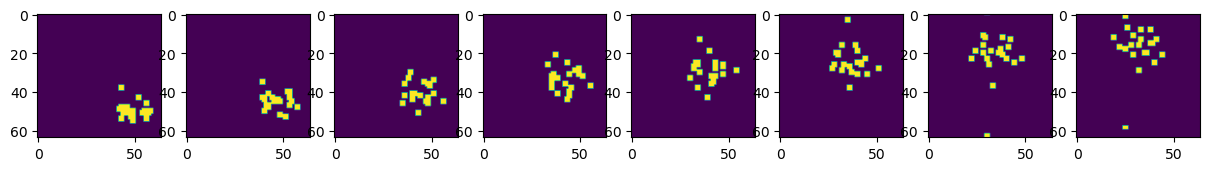

In [50]:
print(dataset[0][1])
plt.figure(1,figsize=(15,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(dataset[0][0][i])